In [ ]:
import torch
import data_utils
import torch.utils.data as data
from utils import JsonConfig
import numpy as np

In [ ]:
np.sqrt(1)

1.0

In [1]:
print("github")

github


In [ ]:
import importlib

importlib.reload(data_utils)

<module 'data_utils' from 'c:\\root\\college\\stage intérnational\\ECG project\\code\\Custom\\data_utils.py'>

In [ ]:
# from sklearn.metrics import mean_squared_error

# RMSEs = []
# for data in dataset:
#   x,y = data
#   out = wavenet.generate(x.unsqueeze(0))
#   out = out.detach().numpy()
#   out = one_hot_decode(out, axis = 2)
#   out = out.squeeze(0)
#   rmse = mean_squared_error(out,y,  squared=False)
#   RMSEs.append(rmse)

# np.mean(RMSEs)

In [ ]:
data_dir = "../data/ptb-xl/"

In [ ]:
args = {"channels" : 256, "n_layers" : 5, "lr" : 0.001 , "data_dir" : data_dir, "batch_size" : 100, "num_epoch" : 2000, "data_len" : 100}
args = JsonConfig(**args)

In [ ]:
raw_set = data_utils.RawDataset(args.data_dir, receptive_fields=10,sample_size=1000 , data_len = 1000, istraining=False)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
layer = torch.nn.Conv1d(12, 1, 1)

In [ ]:
inp = raw_set[0]

In [ ]:
inp = inp.transpose()

In [ ]:
inp  = torch.from_numpy(inp).float()

In [ ]:
layer(inp).shape

torch.Size([1, 1000])

### Line plot

In [ ]:
ecg0 = raw_set[0]

In [ ]:
date_range = pd.date_range(start='2023-01-01', periods=1000, freq='D')

df = pd.DataFrame(ecg0, index = date_range, columns=[f'lead {i+1}' for i in range(12)])

In [ ]:
df.head()

,lead 1,lead 2,lead 3,lead 4,lead 5,lead 6,lead 7,lead 8,lead 9,lead 10,lead 11,lead 12
2023-01-01,-0.119,-0.055,0.064,0.086,-0.091,0.004,-0.069,-0.031,0.000,-0.026,-0.039,-0.079
2023-01-02,-0.116,-0.051,0.065,0.083,-0.090,0.006,-0.064,-0.036,-0.003,-0.031,-0.034,-0.074
2023-01-03,-0.120,-0.044,0.076,0.082,-0.098,0.016,-0.058,-0.034,-0.010,-0.028,-0.029,-0.069
2023-01-04,-0.117,-0.038,0.080,0.077,-0.098,0.021,-0.050,-0.030,-0.015,-0.023,-0.022,-0.064
2023-01-05,-0.103,-0.031,0.072,0.066,-0.087,0.021,-0.045,-0.027,-0.020,-0.019,-0.018,-0.058


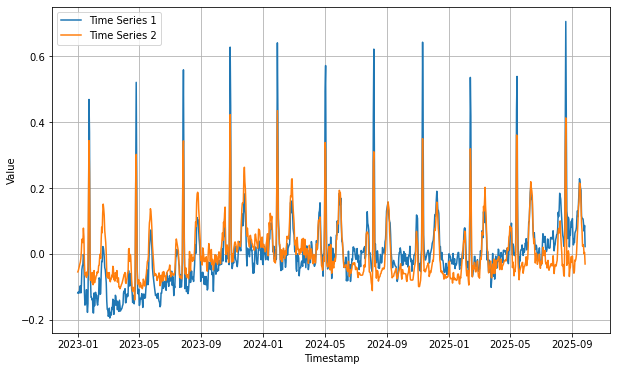

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(2):
    plt.plot(df.index, df[f'lead {i+1}'], label=f'Time Series {i+1}')
plt.xlabel('Timestamp')
plt.ylabel('Value')
# plt.title('Time Series Data Visualization')
plt.legend()
plt.grid(True)
plt.show()


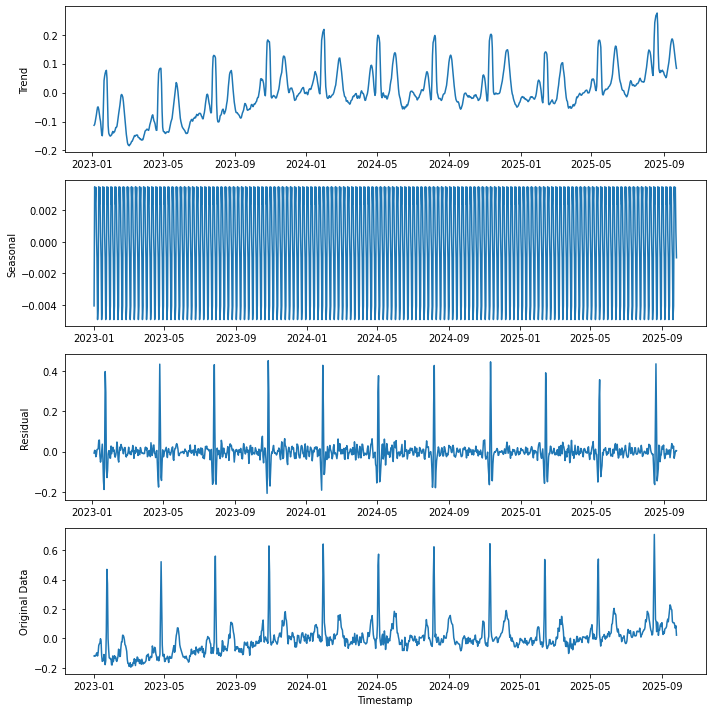

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['lead 1'], model='additive')

# Plot the decomposition results
plt.figure(figsize=(10, 10))
plt.subplot(4, 1, 1)
plt.plot(decomposition.trend)
plt.ylabel('Trend')
plt.subplot(4, 1, 2)
plt.plot(decomposition.seasonal)
plt.ylabel('Seasonal')
plt.subplot(4, 1, 3)
plt.plot(decomposition.resid)
plt.ylabel('Residual')
plt.subplot(4, 1, 4)
plt.plot(decomposition.observed)
plt.ylabel('Original Data')
plt.xlabel('Timestamp')
plt.tight_layout()
plt.show()


In [ ]:
time_series = df['lead 1'].values

# Number of data points and sampling rate (assuming the data is equally spaced in time)
n = len(time_series)
sampling_rate = 1  # Replace with your actual sampling rate if it's different

# Compute the FFT (Fast Fourier Transform) of the time series
fft_result = np.fft.fft(time_series)

# Calculate the frequencies corresponding to the FFT components
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)

# Get the magnitude (amplitude) of the FFT components (excluding the DC component)
magnitude = np.abs(fft_result[1:n//2+1])

# Get the corresponding frequencies for the magnitude values
positive_frequencies = frequencies[1:n//2+1]

# Find the dominant frequency (peak) and its amplitude
dominant_frequency_index = np.argmax(magnitude)
dominant_frequency = positive_frequencies[dominant_frequency_index]
dominant_amplitude = magnitude[dominant_frequency_index]

# Print the dominant frequency and its amplitude
print(f"Dominant Frequency: {dominant_frequency} Hz")
print(f"Dominant Amplitude: {dominant_amplitude}")

Dominant Frequency: 0.032 Hz
Dominant Amplitude: 24.163427669037276


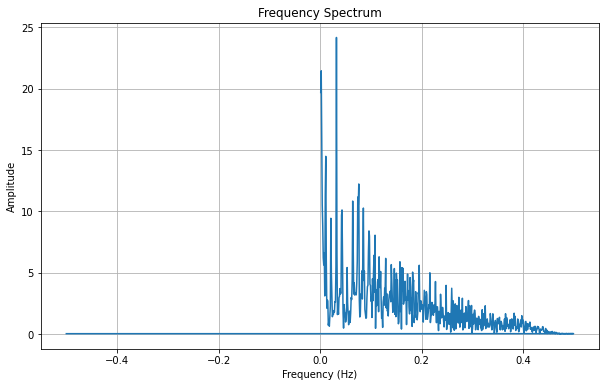

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies, magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum')
plt.grid(True)
plt.show()

In [ ]:
def generate_dilations(n_layers):
        return [2**i for i in range(n_layers)]

def generate_channels(channels, n_layers):

        last = channels*2
        l = [(channels, last)]

        for i in range(1, n_layers):
            if last*2<512:
                l.append((last, last*2))
                last = last*2
            else:
                l.append((last, 512))
                last = 512

        return l

In [ ]:
d = generate_dilations(5)
c = generate_channels(1, 5)

In [ ]:
for e in zip(d,c):
    print(e[1][0],e[1][1], e[0])
    # print(e[0][0],e[0][1], e[1])

1 2 1
2 4 2
4 8 4
8 16 8
16 32 16


In [ ]:
a = np.array([1,12,12])

In [ ]:
b = a.copy()

In [ ]:
b[1] = 23

In [ ]:
a = [0.05556610971689224, 0.024968944489955902, 0.01946958154439926, 0.04315435141324997, 0.015641717240214348, 0.026166265830397606, 0.014415876939892769, 0.012611668556928635, 0.04954707249999046, 0.016940051689743996, 0.0261128768324852, 0.014674543403089046, 0.01839873567223549, 0.018320778384804726, 0.00863371416926384, 0.024489540606737137, 0.027023324742913246, 0.012143575586378574, 0.025486420840024948, 0.053433120250701904, 0.07788281887769699, 0.017780622467398643, 0.01301182433962822, 0.01366532314568758, 0.015966469421982765, 0.017847420647740364, 0.011015884578227997, 0.018242351710796356, 0.01584053225815296, 0.006569768767803907, 0.014584838412702084, 0.011348981410264969, 0.012183580547571182, 0.020510505884885788, 0.013054920360445976, 0.00958520919084549, 0.009818344376981258, 0.01738603785634041, 0.0192183218896389, 0.010726730339229107, 0.008633243851363659, 0.017403796315193176, 0.017387526109814644, 0.015669725835323334, 0.012489402666687965, 0.014787577092647552, 0.008505180478096008, 0.02859213575720787, 0.02769435942173004, 0.04348708689212799, 0.010073928162455559, 0.011411731131374836, 0.021184029057621956, 0.03665691986680031, 0.017521440982818604, 0.012399276718497276, 0.029011080041527748, 0.008342930115759373, 0.014104887843132019, 0.012655161321163177, 0.012534328736364841, 0.009721661917865276, 0.025895269587635994, 0.05342179909348488, 0.014231273904442787, 0.016733797267079353, 0.03955024853348732, 0.01375412568449974, 0.015218762680888176, 0.01438085176050663, 0.01205404195934534, 0.017234420403838158, 0.03365856781601906, 0.015404393896460533, 0.026559947058558464, 0.010928341187536716, 0.013039931654930115, 0.017614107578992844, 0.05127169191837311, 0.015142417512834072, 0.016031047329306602, 0.009044461883604527, 0.01834847405552864, 0.03751850873231888, 0.012532972730696201, 0.013657359406352043, 0.007459988817572594, 0.020202748477458954, 0.01952538453042507, 0.020468827337026596, 0.010003221221268177, 0.017001239582896233, 0.017569206655025482, 0.014382666908204556, 0.023768607527017593, 0.01602874882519245, 0.023745222017169, 0.013718987815082073, 0.009673590771853924, 0.03144870698451996]

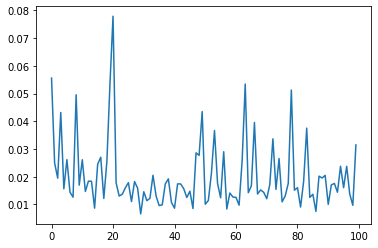

In [ ]:
plt.plot(a)

In [ ]:
from networks import *

In [ ]:
my_wavenet = Rawnet(5)

In [ ]:
for i in my_wavenet.children():
    print(i)
    print("####################")

RawStack(
  (layers): ModuleList(
    (0): RawBlock(
      (h_dilatedCausalConv): DilatedCausalConv(
        (conv): Conv1d(1, 1, kernel_size=(2,), stride=(1,), bias=False)
      )
      (x_dilatedCausalConv): DilatedCausalConv(
        (conv): Conv1d(1, 1, kernel_size=(2,), stride=(1,), bias=False)
      )
      (tanh): Tanh()
    )
    (1): RawBlock(
      (h_dilatedCausalConv): DilatedCausalConv(
        (conv): Conv1d(1, 1, kernel_size=(2,), stride=(1,), dilation=(2,), bias=False)
      )
      (x_dilatedCausalConv): DilatedCausalConv(
        (conv): Conv1d(1, 1, kernel_size=(2,), stride=(1,), dilation=(2,), bias=False)
      )
      (tanh): Tanh()
    )
    (2): RawBlock(
      (h_dilatedCausalConv): DilatedCausalConv(
        (conv): Conv1d(1, 1, kernel_size=(2,), stride=(1,), dilation=(4,), bias=False)
      )
      (x_dilatedCausalConv): DilatedCausalConv(
        (conv): Conv1d(1, 1, kernel_size=(2,), stride=(1,), dilation=(4,), bias=False)
      )
      (tanh): Tanh()
    )


In [ ]:
s = torch.zeros((1,2,10))

In [ ]:
s

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]])

In [ ]:
s + 1

tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]])

In [ ]:

# Tensor A: 2x3
A = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])

# Tensor B: 1x3
B = torch.tensor([10, 20, 30])

# Broadcasting occurs here
result = A + B

print(result)

tensor([[11, 22, 33],
        [14, 25, 36]])


In [ ]:
args = {"channels" : 256, "n_layers" : 6,"n_blocks":3, "lr" : 0.01 , "data_dir" : "../data/ptb-xl/", "batch_size" : 32, "num_epoch" : 100, "data_len" : 10, "conditioned": False}
args = JsonConfig(**args)

In [ ]:
import time

In [ ]:
int(time.time())

1691858847